# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: USA (^GSPC)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^GSPC", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "^GSPC"

**Checking data frequency**

In [4]:
periodicity(GSPC)        

Daily periodicity from 2000-01-03 to 2021-05-28 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(GSPC)))*100, digits = 2)       


FALSE 
  100 

**Removing missing values**

In [6]:
GSPC <- na.omit(GSPC)    
round(prop.table(table(is.na(GSPC)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
GSPC.df <- GSPC[,'GSPC.Close']                              
head(GSPC.df)

           GSPC.Close
2000-01-03    1455.22
2000-01-04    1399.42
2000-01-05    1402.11
2000-01-06    1403.45
2000-01-07    1441.47
2000-01-10    1457.60

**Calculating log-returns**

In [8]:
logreturn <- diff(log(GSPC.df$GSPC.Close))*100                     
head(logreturn)

            GSPC.Close
2000-01-03          NA
2000-01-04 -3.90991755
2000-01-05  0.19203377
2000-01-06  0.09552219
2000-01-07  2.67299501
2000-01-10  1.11278250

**Aggregating the data**

In [9]:
GSPC.df$GSPC.Return <- logreturn                  
GSPC.df <- na.omit(GSPC.df)
head(GSPC.df)

           GSPC.Close GSPC.Return
2000-01-04    1399.42 -3.90991755
2000-01-05    1402.11  0.19203377
2000-01-06    1403.45  0.09552219
2000-01-07    1441.47  2.67299501
2000-01-10    1457.60  1.11278250
2000-01-11    1438.56 -1.31485768

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(GSPC.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



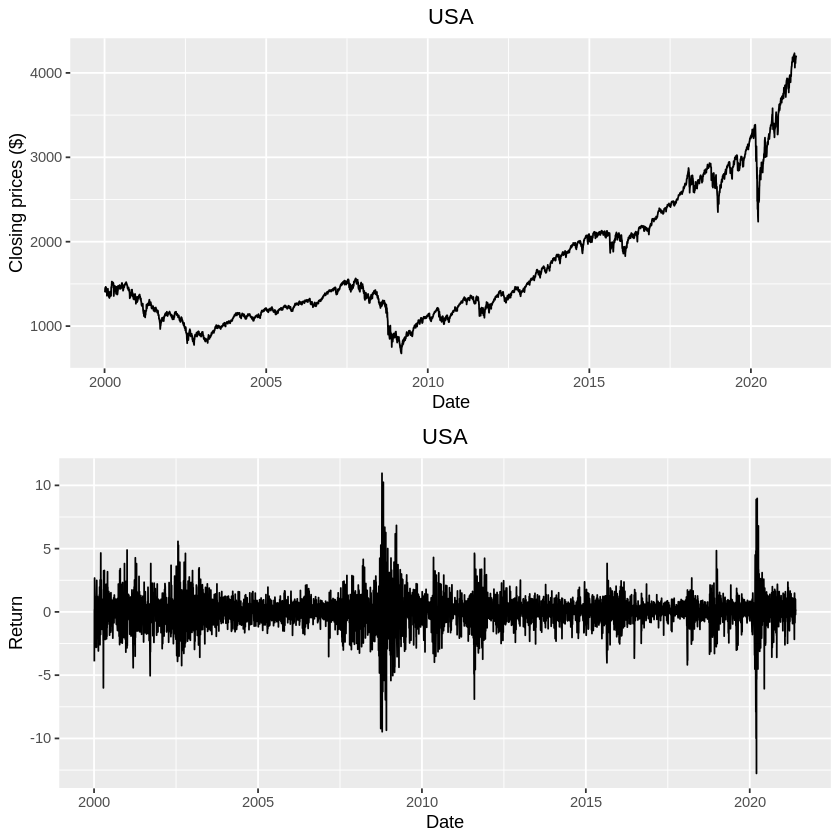

In [12]:
# Price chart
graph1 <- ggplot(GSPC.df,
                aes(x = index(GSPC.df), y = GSPC.df[,'GSPC.Close'])) +
                geom_line(color = "black") +
                ggtitle("USA") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(GSPC.df,
                aes(x = index(GSPC.df), y = GSPC.df[,'GSPC.Return'])) +
                geom_line(color = "black") +
                ggtitle("USA") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(GSPC.df$GSPC.Return), 3)                         

[1] 0.02

In [15]:
# sd
round(sd(GSPC.df$GSPC.Return), 3)                           

[1] 1.25

In [16]:
# skewness
round(skewness(GSPC.df$GSPC.Return), 3)                     

GSPC.Return 
     -0.396

In [17]:
# kurtosis
round(kurtosis(GSPC.df$GSPC.Return), 3)                     

GSPC.Return 
     13.946

In [18]:
# min
round(min(GSPC.df$GSPC.Return), 3)                          

[1] -12.765

In [19]:
# p5
round(quantile(GSPC.df$GSPC.Return, probs = 0.05), 3)       

5% 
-1.912

In [20]:
# p25
round(quantile(GSPC.df$GSPC.Return, probs = 0.25), 3)       

25% 
-0.475

In [21]:
# median
round(median(GSPC.df$GSPC.Return), 3)                       

[1] 0.06

In [22]:
# p75
round(quantile(GSPC.df$GSPC.Return, probs = 0.75), 3)       

75% 
0.582

In [23]:
# p95
round(quantile(GSPC.df$GSPC.Return, probs = 0.95), 3)       

95% 
1.704

In [24]:
# max
round(max(GSPC.df$GSPC.Return), 3)                          

[1] 10.957

In [25]:
# n observations
length(GSPC.df$GSPC.Return)                                 

[1] 5385

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(GSPC.df$GSPC.Return)


	Jarque Bera Test

data:  GSPC.df$GSPC.Return
X-squared = 27022, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

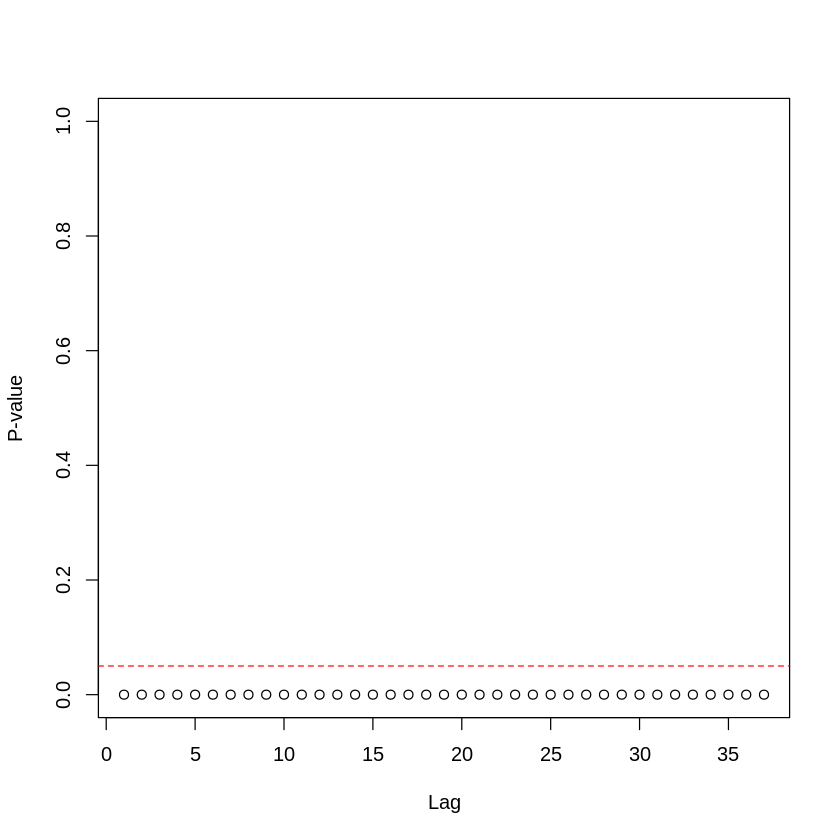

In [29]:
McLeod.Li.test(y = GSPC.df$GSPC.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(GSPC.df$GSPC.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GSPC.df$GSPC.Return
Chi-squared = 1614, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = GSPC.df$GSPC.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0509,0.0107,4.7757,0
omega,0.0206,0.0028,7.3417,0
alpha1,0.1216,0.0093,13.0908,0
beta1,0.8627,0.0096,90.0284,0
skew,0.8510,0.0143,59.3819,0


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

GSPC.df$GSPC.VolGARCH <- as.numeric(var.garch)
head(GSPC.df)

[1] 1.562444 3.275385 2.848624 2.478284 2.994259 2.740737

           GSPC.Close GSPC.Return GSPC.VolGARCH
2000-01-04    1399.42 -3.90991755      1.562444
2000-01-05    1402.11  0.19203377      3.275385
2000-01-06    1403.45  0.09552219      2.848624
2000-01-07    1441.47  2.67299501      2.478284
2000-01-10    1457.60  1.11278250      2.994259
2000-01-11    1438.56 -1.31485768      2.740737

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = GSPC.df$GSPC.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0093,0.0099,0.9377,0.3484
omega,0.0029,0.0025,1.1738,0.2405
alpha1,-0.1423,0.0071,-20.1072,0.0000
beta1,0.9732,0.0010,982.4989,0.0000
gamma1,0.1522,0.0107,14.1643,0.0000
skew,0.8256,0.0141,58.3878,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

GSPC.df$GSPC.VolEGARCH <- as.numeric(var.egarch)
head(GSPC.df)

[1] 1.561579 3.450471 2.967256 2.560819 2.254441 1.973305

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579
2000-01-05    1402.11  0.19203377      3.275385       3.450471
2000-01-06    1403.45  0.09552219      2.848624       2.967256
2000-01-07    1441.47  2.67299501      2.478284       2.560819
2000-01-10    1457.60  1.11278250      2.994259       2.254441
2000-01-11    1438.56 -1.31485768      2.740737       1.973305

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = GSPC.df$GSPC.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0069,0.0109,0.6363,0.5246
omega,0.0207,0.0028,7.4571,0.0000
alpha1,0.0000,0.0082,0.0000,1.0000
beta1,0.8920,0.0119,74.9526,0.0000
gamma1,0.1783,0.0146,12.2360,0.0000
skew,0.8291,0.0142,58.5176,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

GSPC.df$GSPC.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(GSPC.df)

[1] 1.561633 4.148383 3.721119 3.339993 3.000022 2.696762

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                          solver = 'hybrid',
                          realizedVol = GSPC.df$GSPC.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0222,0.0185,1.2002,0.2301
alpha1,0.9651,0.0242,39.8619,0.0000
beta1,0.0325,0.0134,2.4268,0.0152
eta11,0.0058,0.0024,2.4316,0.0150
eta21,0.0092,0.0012,7.9106,0.0000
delta,0.9846,0.0206,47.7908,0.0000
lambda,0.1681,0.0016,103.7741,0.0000
skew,0.8373,0.0138,60.6380,0.0000
xi,-0.0247,0.0187,-1.3239,0.1856


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

GSPC.df$GSPC.VolRealGARCH <- as.numeric(var.realgarch)
head(GSPC.df)

[1] 1.561858 1.595723 3.262161 2.917996 2.541774 3.037120

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH
2000-01-04          1.561858
2000-01-05          1.595723
2000-01-06          3.262161
2000-01-07          2.917996
2000-01-10          2.541774
2000-01-11          3.037120

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                            solver = 'hybrid',
                            realizedVol = GSPC.df$GSPC.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0241,0.0187,1.2889,0.1974
alpha1,0.9681,0.0228,42.4164,0.0000
beta1,0.0228,0.0135,1.6968,0.0897
eta11,0.0154,0.0027,5.7537,0.0000
eta21,0.0129,0.0013,10.1255,0.0000
delta,0.9872,0.0188,52.5128,0.0000
lambda,0.1878,0.0018,103.7698,0.0000
skew,0.8273,0.0139,59.6305,0.0000
xi,-0.0278,0.0187,-1.4857,0.1373


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

GSPC.df$GSPC.VolRealEGARCH <- as.numeric(var.realegarch)
head(GSPC.df)

[1] 1.561858 1.593167 3.433945 3.019783 2.610749 2.300097

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH
2000-01-04          1.561858           1.561858
2000-01-05          1.595723           1.593167
2000-01-06          3.262161           3.433945
2000-01-07          2.917996           3.019783
2000-01-10          2.541774           2.610749
2000-01-11          3.037120           2.300097

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, GSPC.df$GSPC.Return,
                              solver = 'hybrid',
                              realizedVol = GSPC.df$GSPC.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0174,0.0189,0.9182,0.3585
alpha1,0.9708,0.0238,40.7060,0.0000
beta1,0.0107,0.0134,0.7999,0.4238
eta11,0.0127,0.0027,4.7945,0.0000
eta21,0.0123,0.0013,9.4900,0.0000
delta,0.9974,0.0204,49.0043,0.0000
lambda,0.1872,0.0018,103.7729,0.0000
skew,0.8280,0.0139,59.3712,0.0000
xi,-0.0207,0.0190,-1.0945,0.2737


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

GSPC.df$GSPC.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(GSPC.df)

[1] 1.561858 1.575997 4.069337 3.699311 3.327489 2.994752

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595723           1.593167             1.575997
2000-01-06          3.262161           3.433945             4.069337
2000-01-07          2.917996           3.019783             3.699311
2000-01-10          2.541774           2.610749             3.327489
2000-01-11          3.0371

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = GSPC.df$GSPC.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0272 4.892e-01
alpha1_1   0.0344     0.0182   1.8863 2.963e-02
beta_1     0.8538     0.0262  32.5413    <1e-16
xi_1       0.8346     0.0691  12.0747    <1e-16
alpha0_2   0.0403     0.0060   6.6972 1.062e-11
alpha1_2   0.1404     0.0666   2.1070 1.756e-02
beta_2     0.8569     0.0014 601.7719    <1e-16
xi_2       0.7886     0.0186  42.4369    <1e-16
P_1_1      0.0855     0.1588   0.5384 2.952e-01
P_2_1      0.3533     0.0170  20.7456    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

GSPC.df$GSPC.VolMSGARCH <- as.numeric(var.msgarch)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.276597 3.305074 3.274653 2.966525 2.645947 2.681863

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595723           1.593167             1.575997
2000-01-06          3.262161           3.433945             4.069337
2000-01-07          2.917996           3.019783             3.699311
2000-01-10          2.541774           2.610749             3.327489
2000-01-11          3.0371

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = GSPC.df$GSPC.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0338     0.0048  -6.9625 1.672e-12
alpha1_1   0.0723     0.0055  13.1025    <1e-16
alpha2_1  -0.1587     0.0096 -16.6149    <1e-16
beta_1     0.9857     0.0028 349.8151    <1e-16
xi_1       0.8627     0.0357  24.1505    <1e-16
alpha0_2   0.0478     0.0089   5.3725 3.882e-08
alpha1_2   0.1674     0.0287   5.8390 2.626e-09
alpha2_2  -0.1451     0.0171  -8.4760    <1e-16
beta_2     0.9737     0.0048 202.8118    <1e-16
xi_2       0.6796     0.0314  21.6282    <1e-16
P_1_1      0.4847     0.0681   7.1209 5.360e-13
P_2_1      0.6813     0.0610  1

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

GSPC.df$GSPC.VolMSEGARCH <- as.numeric(var.msegarch)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.643934 2.179894 2.092194 1.949728 1.651572 1.694772

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595723           1.593167             1.575997
2000-01-06          3.262161           3.433945             4.069337
2000-01-07          2.917996           3.019783             3.699311
2000-01-10          2.541774           2.610749             3.327489
2000-01-11          3.0371

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = GSPC.df$GSPC.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0053     0.0025   2.1357 1.635e-02
alpha1_1   0.0000     0.0001   0.0276 4.890e-01
alpha2_1   0.3562     0.0548   6.5005 4.002e-11
beta_1     0.7857     0.0145  54.2834    <1e-16
xi_1       0.8493     0.0348  24.4179    <1e-16
alpha0_2   0.0134     0.0040   3.3378 4.223e-04
alpha1_2   0.0000     0.0001   0.0152 4.939e-01
alpha2_2   0.0660     0.0242   2.7243 3.221e-03
beta_2     0.9602     0.0022 433.9259    <1e-16
xi_2       0.7564     0.0322  23.5007    <1e-16
P_1_1      0.4465     0.0695   6.4254 6.575e-11
P_2_1      0.6855     0.088

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

GSPC.df$GSPC.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(GSPC.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.489905 2.362672 2.196829 2.055679 1.919118 1.830647

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-04    1399.42 -3.90991755      1.562444       1.561579         1.561633
2000-01-05    1402.11  0.19203377      3.275385       3.450471         4.148383
2000-01-06    1403.45  0.09552219      2.848624       2.967256         3.721119
2000-01-07    1441.47  2.67299501      2.478284       2.560819         3.339993
2000-01-10    1457.60  1.11278250      2.994259       2.254441         3.000022
2000-01-11    1438.56 -1.31485768      2.740737       1.973305         2.696762
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-04          1.561858           1.561858             1.561858
2000-01-05          1.595723           1.593167             1.575997
2000-01-06          3.262161           3.433945             4.069337
2000-01-07          2.917996           3.019783             3.699311
2000-01-10          2.541774           2.610749             3.327489
2000-01-11          3.0371

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(GSPC.df)                

[1] 5385

In [60]:
# Cut-line
round(nrow(GSPC.df)*0.7, digits = 0)

[1] 3769

In [61]:
# In-sample
GSPC.df.in <- GSPC.df[1:round(nrow(GSPC.df)*0.7, digits = 0),]
dim(GSPC.df.in)

[1] 3769   11

In [62]:
# Out-sample
GSPC.df.out <- GSPC.df[(round(nrow(GSPC.df)*0.7, digits = 0)+1):nrow(GSPC.df),]
dim(GSPC.df.out)

[1] 1616   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            GSPC.df$GSPC.Return,
                            out.sample = dim(GSPC.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(GSPC.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [67]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(GSPC.df.out)[1],
                               data = GSPC.df$GSPC.Return,
                               out.sample = dim(GSPC.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [68]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = GSPC.df$GSPC.Return,
                                n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(GSPC.df.out)[1])                                 

In [69]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.9655    0.9660    0.9655
2014-12-30 0.9083    0.9225    0.9083
2014-12-31 0.8763    0.8965    0.8763
2015-01-02 0.9092    0.9185    0.9092
2015-01-05 0.8571    0.8781    0.8571
2015-01-06 1.0446    1.0189    1.0446

In [70]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(GSPC.df.out$GSPC.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,0.9224815,0.9082768,0.9322557
2,0.8964958,0.8762596,0.8249668
3,0.9184576,0.9092205,0.7678308
4,0.8781446,0.8570969,0.8266819
5,1.0189041,1.0445565,0.7346152
6,1.0132097,1.0345144,1.0910983


**Performance evaluation**

In [71]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -0.009774229  0.071529023  0.150626718  0.051462670  0.284288971
[6] -0.077888638

In [72]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -0.02397891  0.05129278  0.14138967  0.03041502  0.30994136 -0.05658394

In [73]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 8.855

In [74]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 8.773

In [75]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 0.688

In [76]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 0.681

In [77]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 2.976

In [78]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 2.962

In [79]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 0.8518

In [80]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 0.83695

In [81]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.6964, forecast horizon = 1, p-value = 0.08981
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [82]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.6959, Forecast horizon = 1, Loss function power = 2, p-value =
0.09011
alternative hypothesis: two.sided


In [83]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 1.079

In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 1.057

In [85]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -23.857

In [86]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -23.867

In [87]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.405      0.721  -4.719 < 2.2e-16 ***
sigma.garch.pred.a    4.916      0.821   5.991 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.82

In [88]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.304      0.625  -5.289 < 2.2e-16 ***
sigma.garch.pred.b    4.867      0.719   6.769 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.833

##(b) EGARCH

**Forecast**

In [89]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [90]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             GSPC.df$GSPC.Return,
                             out.sample = dim(GSPC.df.out)[1])

In [91]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(GSPC.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [92]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(GSPC.df.out)[1],
                                data = GSPC.df$GSPC.Return,
                                out.sample = dim(GSPC.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [93]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = GSPC.df$GSPC.Return,
                                n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(GSPC.df.out)[1]) 

In [94]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.7692    0.7315    0.7692
2014-12-30 0.7304    0.7049    0.7304
2014-12-31 0.7676    0.7437    0.7676
2015-01-02 0.8903    0.8558    0.8903
2015-01-05 0.8477    0.8282    0.8477
2015-01-06 1.1072    1.0563    1.1072

In [95]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(GSPC.df.out$GSPC.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,0.7049280,0.7303532,0.5916666
2,0.7437039,0.7675875,0.5334158
3,0.8558249,0.8902962,0.5891906
4,0.8282157,0.8476615,0.7926273
5,1.0563141,1.1071655,0.7185299
6,1.1267267,1.1732215,1.2258155


**Performance evaluation**

In [96]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1]  0.11326139  0.21028811  0.26663430  0.03558841  0.33778411 -0.09908878

In [97]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1]  0.13868661  0.23417174  0.30110556  0.05503419  0.38863558 -0.05259398

In [98]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 4.618

In [99]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 4.58

In [100]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 0.556

In [101]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 0.558

In [102]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 2.149

In [103]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 2.14

In [104]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 0.79598

In [105]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 0.80658

In [106]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.4017, forecast horizon = 1, p-value = 0.161
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [107]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.4013, Forecast horizon = 1, Loss function power = 2, p-value =
0.1613
alternative hypothesis: two.sided


In [108]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 0.847

In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 0.849

In [110]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -18.901

In [111]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -18.958

In [112]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.466      0.671  -3.674 < 2.2e-16 ***
sigma.egarch.pred.a    3.979      0.794   5.010 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.769

In [113]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.488      0.646  -3.853 < 2.2e-16 ***
sigma.egarch.pred.b    3.976      0.759   5.242 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.78

##(c) GJR-GARCH

**Forecast**

In [114]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [115]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              GSPC.df$GSPC.Return,
                              out.sample = dim(GSPC.df.out)[1])

In [116]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(GSPC.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [117]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(GSPC.df.out)[1],
                                  data = GSPC.df$GSPC.Return,
                                  out.sample = dim(GSPC.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [118]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = GSPC.df$GSPC.Return,
                                   n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(GSPC.df.out)[1]) 

In [119]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.7954    0.8025    0.7954
2014-12-30 0.7649    0.7741    0.7649
2014-12-31 0.7659    0.7738    0.7659
2015-01-02 0.8591    0.8582    0.8591
2015-01-05 0.8242    0.8264    0.8242
2015-01-06 1.1126    1.0945    1.1126

In [120]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(GSPC.df.out$GSPC.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,0.7741452,0.7648672,0.6326470
2,0.7738093,0.7658776,0.5850219
3,0.8581809,0.8590513,0.5865684
4,0.8264060,0.8241783,0.7379691
5,1.0945239,1.1125511,0.6792698
6,1.1098763,1.1266187,1.2377699


**Performance evaluation**

In [121]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1]  0.14149820  0.18878746  0.27161245  0.08843692  0.41525410 -0.12789358

In [122]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1]  0.13222028  0.18085567  0.27248285  0.08620916  0.43328123 -0.11115113

In [123]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 10.987

In [124]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 11.008

In [125]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 0.749

In [126]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 0.752

In [127]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 3.315

In [128]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 3.318

In [129]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 0.84183

In [130]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 0.83456

In [131]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.1933, forecast horizon = 1, p-value = 0.2328
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [132]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.1929, Forecast horizon = 1, Loss function power = 2, p-value =
0.2331
alternative hypothesis: two.sided


In [133]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 1.116

In [134]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 1.131

In [135]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -26.654

In [136]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -26.645

In [137]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.399      0.793  -4.287 < 2.2e-16 ***
sigma.gjrgarch.pred.a    4.948      0.895   5.530 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.799

In [138]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.405      0.771  -4.417 < 2.2e-16 ***
sigma.gjrgarch.pred.b    5.000      0.877   5.699 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.805

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [139]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [140]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                GSPC.df$GSPC.Return,
                                out.sample = dim(GSPC.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = GSPC.df$GSPC.VolGARCH)

In [141]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(GSPC.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [142]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(GSPC.df.out)[1], 
                                   data = GSPC.df$GSPC.Return, 
                                   out.sample = dim(GSPC.df.out)[1], 
                                   realizedVol = GSPC.df$GSPC.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [143]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = GSPC.df$GSPC.Return,
                                    n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1],
                                    realizedVol = GSPC.df$GSPC.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(GSPC.df.out)[1])

In [144]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.1194    1.0330    1.1069
2014-12-30 1.0506    0.9737    1.0361
2014-12-31 0.9919    0.9198    0.9835
2015-01-02 0.9335    0.8807    0.9209
2015-01-05 0.8993    0.9024    0.8882
2015-01-06 0.9286    0.8624    0.9184

In [145]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(GSPC.df.out$GSPC.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,0.9737350,1.0361367,1.0744679
2,0.9198424,0.9834967,0.9577053
3,0.8807310,0.9209483,0.8479336
4,0.9024175,0.8882361,0.7880614
5,0.8623696,0.9184100,0.8442688
6,1.0300415,0.8725608,0.7550283


**Performance evaluation**

In [146]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -0.10073288 -0.03786284  0.03279745  0.11435611  0.01810076  0.27501326

In [147]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -0.03833122  0.02579143  0.07301474  0.10017464  0.07414121  0.11753253

In [148]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 9.024

In [149]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 9.004

In [150]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 0.688

In [151]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 0.681

In [152]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 3.004

In [153]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 3.001

In [154]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 0.83641

In [155]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 0.84449

In [156]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 0.34501, forecast horizon = 1, p-value = 0.7301
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [157]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 0.3449, Forecast horizon = 1, Loss function power = 2, p-value =
0.7302
alternative hypothesis: two.sided


In [158]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 1.096

In [159]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 1.076

In [160]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -24.517

In [161]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -24.675

In [162]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.327      0.647  -5.145 < 2.2e-16 ***
sigma.realgarch.pred.a    4.913      0.742   6.624 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.84

In [163]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.445      0.700  -4.920 < 2.2e-16 ***
sigma.realgarch.pred.b    4.990      0.789   6.327 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.854

##(b) Realized EGARCH

**Forecast**

In [164]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [165]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 GSPC.df$GSPC.Return,
                                 out.sample = dim(GSPC.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = GSPC.df$GSPC.VolEGARCH)

In [166]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(GSPC.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [167]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(GSPC.df.out)[1], 
                                   data = GSPC.df$GSPC.Return, 
                                   out.sample = dim(GSPC.df.out)[1], 
                                   realizedVol = GSPC.df$GSPC.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [168]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = GSPC.df$GSPC.Return,
                                     n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1],
                                     realizedVol = GSPC.df$GSPC.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(GSPC.df.out)[1])

In [169]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.8784    0.8081    0.8726
2014-12-30 0.8353    0.7633    0.8234
2014-12-31 0.7940    0.7230    0.7838
2015-01-02 0.7546    0.7532    0.7433
2015-01-05 0.7888    0.8797    0.7764
2015-01-06 0.9083    0.8457    0.8986

In [170]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(GSPC.df.out$GSPC.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,0.7632716,0.8234433,0.6767619
2,0.7230138,0.7837895,0.6108300
3,0.7531983,0.7433141,0.5512238
4,0.8797408,0.7763720,0.6055115
5,0.8457016,0.8985708,0.8086482
6,1.0902366,0.8583184,0.7402249


**Performance evaluation**

In [171]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] 0.08650976 0.11218379 0.20197449 0.27422936 0.03705336 0.35001169

In [172]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] 0.14668150 0.17295947 0.19209038 0.17086048 0.08992252 0.11809352

In [173]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 4.391

In [174]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 4.485

In [175]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 0.543

In [176]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 0.55

In [177]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 2.096

In [178]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 2.118

In [179]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 0.79958

In [180]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 0.81532

In [181]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.742, forecast horizon = 1, p-value = 0.08151
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [182]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.7415, Forecast horizon = 1, Loss function power = 2, p-value =
0.08179
alternative hypothesis: two.sided


In [183]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 0.836

In [184]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 0.861

In [185]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -19.27

In [186]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -19.464

In [187]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.331      0.584  -3.993 < 2.2e-16 ***
sigma.realegarch.pred.a    3.822      0.686   5.572 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.8

In [188]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.649      0.668  -3.964 < 2.2e-16 ***
sigma.realegarch.pred.b    4.131      0.773   5.347 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.821

##(c) Realized GJR-GARCH

**Forecast**

In [189]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [190]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  GSPC.df$GSPC.Return,
                                  out.sample = dim(GSPC.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = GSPC.df$GSPC.VolGJRGARCH)

In [191]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(GSPC.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [192]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(GSPC.df.out)[1], 
                                     data = GSPC.df$GSPC.Return, 
                                     out.sample = dim(GSPC.df.out)[1], 
                                     realizedVol = GSPC.df$GSPC.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [193]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = GSPC.df$GSPC.Return,
                                      n.old = nrow(GSPC.df) - dim(GSPC.df.out)[1],
                                      realizedVol = GSPC.df$GSPC.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(GSPC.df.out)[1])

In [194]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 0.8843    0.8314    0.8775
2014-12-30 0.8494    0.7934    0.8372
2014-12-31 0.8169    0.7651    0.8050
2015-01-02 0.7867    0.7630    0.7805
2015-01-05 0.7870    0.8514    0.7809
2015-01-06 0.8770    0.8279    0.8698

In [195]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(GSPC.df.out$GSPC.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,0.7934433,0.8372426,0.7037276
2,0.7650638,0.8050225,0.6499229
3,0.7630411,0.7804906,0.6018560
4,0.8513842,0.7808608,0.6029028
5,0.8279305,0.8698389,0.7534715
6,1.0982789,0.8330162,0.6968846


**Performance evaluation**

In [196]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] 0.08971571 0.11514094 0.16118506 0.24848139 0.07445902 0.40139435

In [197]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] 0.1335150 0.1550996 0.1786345 0.1779580 0.1163673 0.1361316

In [198]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 9.746

In [199]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 9.939

In [200]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 0.719

In [201]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 0.723

In [202]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 3.122

In [203]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 3.153

In [204]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 0.83305

In [205]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 0.84186

In [206]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -2.4427, forecast horizon = 1, p-value = 0.01458
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [207]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.442, Forecast horizon = 1, Loss function power = 2, p-value =
0.01471
alternative hypothesis: two.sided


In [208]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 1.095

In [209]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 1.133

In [210]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -25.939

In [211]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -26.15

In [212]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.191      0.705  -4.529 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    4.766      0.802   5.946 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

In [213]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.550      0.772  -4.596 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    5.126      0.873   5.870 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.832

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [214]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = GSPC.df$GSPC.Return)

In [215]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = GSPC.df$GSPC.Return)

In [216]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(GSPC.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [217]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(GSPC.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [218]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(GSPC.df.out[,'GSPC.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,0.7695294,0.7638487,0.9650514
2,0.7562684,0.7809349,0.9159260
3,0.7603069,0.7557660,0.8651894
4,0.7785906,0.7686327,0.8604492
5,0.7832613,0.7881866,0.8690969
6,0.7912886,0.7913166,0.9635197


**Performance evaluation**

In [219]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.19552198 -0.15965761 -0.10488256 -0.08185858 -0.08583564 -0.17223109

In [220]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.20120269 -0.13499109 -0.10942344 -0.09181652 -0.08091031 -0.17220316

In [221]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.36

In [222]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.475

In [223]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.337

In [224]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.518

In [225]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.6

In [226]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.689

In [227]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 0.94855

In [228]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.31779

In [229]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -11.544, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [230]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -11.541, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [231]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.295

In [232]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.261

In [233]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] 0.221

In [234]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] 1.989

In [235]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)
(Intercept)             0.448      0.691   0.648    0.517
sigma.msgarch.pred.a    0.530      0.734   0.722    0.471


[1] 0

In [236]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.260      0.322   3.915   <2e-16 ***
sigma.msgarch.pred.b   -0.251      0.235  -1.067    0.286    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

##(b) MS EGARCH

**Forecast**

In [237]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = GSPC.df$GSPC.Return)

In [238]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = GSPC.df$GSPC.Return)

In [239]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(GSPC.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [240]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(GSPC.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [241]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(GSPC.df.out[,'GSPC.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,0.7927449,0.6728563,0.7626489
2,0.7922345,0.7414334,0.7356150
3,0.8122955,0.7434595,0.7622206
4,0.8199462,0.7496614,0.8508900
5,0.8245256,0.7316201,0.8547313
6,0.8417435,0.7915161,1.0253793


**Performance evaluation**

In [242]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1]  0.03009598  0.05661948  0.05007487 -0.03094374 -0.03020567 -0.18363578

In [243]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -0.08979262  0.00581832 -0.01876113 -0.10122859 -0.12311115 -0.23386322

In [244]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.037

In [245]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.042

In [246]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.161

In [247]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.171

In [248]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.193

In [249]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.206

In [250]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 0.95493

In [251]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 0.92634

In [252]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.8277, forecast horizon = 1, p-value = 0.06759
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [253]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.8047, Forecast horizon = 1, Loss function power = 2, p-value =
0.07884
alternative hypothesis: two.sided


In [254]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.031

In [255]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.051

In [256]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] 0.907

In [257]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] 0.665

In [258]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)              1.148      0.435   2.639    0.012 *
sigma.msegarch.pred.a   -0.167      0.456  -0.366    0.717  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] -0.018

In [259]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)              0.984      0.351   2.806    0.008 **
sigma.msegarch.pred.b    0.005      0.383   0.014    0.989   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] -0.026

##(c) MS GJR-GARCH

**Forecast**

In [260]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = GSPC.df$GSPC.Return)

In [261]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = GSPC.df$GSPC.Return)

In [262]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(GSPC.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [263]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(GSPC.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [264]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(GSPC.df.out[,'GSPC.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,0.7099699,0.6990276,0.7231144
2,0.7320945,0.7288067,0.7006417
3,0.7367692,0.7392245,0.7098782
4,0.7565750,0.7761930,0.8344030
5,0.7750644,0.7673579,0.7967432
6,0.7946707,0.7779267,1.1715044


**Performance evaluation**

In [265]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -0.01314451  0.03145289  0.02689101 -0.07782797 -0.02167874 -0.37683364

In [266]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.02408684  0.02816504  0.02934629 -0.05821003 -0.02938530 -0.39357766

In [267]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.563

In [268]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.645

In [269]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.572

In [270]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.625

In [271]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.751

In [272]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.803

In [273]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.35361

In [274]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.42495

In [275]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -12.103, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [276]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -12.099, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [277]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.333

In [278]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.391

In [279]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] 0.941

In [280]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] 1.06

In [281]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                0.619      0.291   2.130    0.033 *
sigma.msgjrgarch.pred.a    0.271      0.256   1.056    0.291  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

In [282]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.219      0.181   6.751   <2e-16 ***
sigma.msgjrgarch.pred.b   -0.186      0.114  -1.632    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.002

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [283]:
GSPC.df.month <- apply.monthly(GSPC.df, FUN = mean)
head(GSPC.df.month)

           GSPC.Close GSPC.Return GSPC.VolGARCH GSPC.VolEGARCH GSPC.VolGJRGARCH
2000-01-31   1424.026  -0.2244729      2.142101       2.156164         2.510391
2000-02-29   1388.874  -0.1015650      1.888581       2.090301         2.374502
2000-03-31   1442.213   0.4014076      2.581952       1.715009         1.745755
2000-04-28   1461.355  -0.1646311      3.279021       2.701591         3.320295
2000-05-31   1418.480  -0.1007216      2.566090       2.796594         2.747569
2000-06-30   1461.959   0.1075074      1.622643       1.513009         1.209963
           GSPC.VolRealGARCH GSPC.VolRealEGARCH GSPC.VolRealGJRGARCH
2000-01-31          2.144615           2.107693             2.419108
2000-02-29          1.958693           2.168497             2.418225
2000-03-31          2.616661           1.785156             1.806391
2000-04-28          3.230492           2.660756             3.152841
2000-05-31          2.670479           2.851851             2.817742
2000-06-30          1.7500

##(b) Lag Length Selection

In [284]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [285]:
lags.select(GSPC.df.month$GSPC.VolGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [286]:
lags.select(GSPC.df.month$GSPC.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [287]:
lags.select(GSPC.df.month$GSPC.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [288]:
lags.select(GSPC.df.month$GSPC.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [289]:
lags.select(GSPC.df.month$GSPC.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [290]:
lags.select(GSPC.df.month$GSPC.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [291]:
lags.select(GSPC.df.month$GSPC.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [292]:
lags.select(GSPC.df.month$GSPC.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [293]:
lags.select(GSPC.df.month$GSPC.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [294]:
# Package
library(readxl)

In [295]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [296]:
attach(EPU)

**VIX**

In [297]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [298]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [299]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [300]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$US, EPU$GEPU_current)
head(uncertainty)

           VIX.Close    EPU.US EPU.GEPU_current
2000-01-01     24.95  88.98869         63.43916
2000-02-01     23.37  73.36520         58.77943
2000-03-01     24.11  73.29862         61.33933
2000-04-01     26.20  70.59975         64.76240
2000-05-01     23.65 118.14321         86.84892
2000-06-01     19.54 109.58423         88.23903

In [301]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.US, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [302]:
# Estimation 1 - GARCH (Best BIC:  lag= 1)
garch <- ts(log(GSPC.df.month$GSPC.VolGARCH))
lag.garch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolGARCH), 1))

ols.garch <- cbind(garch, lag.garch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.017      0.033  -0.520    0.603    
lag.garch.1    0.770      0.045  17.198   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.594

In [303]:
# Estimation 2 - GARCH (Best BIC:  lag= 1)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.023      0.064   0.366    0.714    
lag.garch.1    0.780      0.047  16.470   <2e-16 ***
lag.epu        0.000      0.000  -0.673    0.502    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.593

In [304]:
# Estimation 3 - GARCH (Best BIC:  lag= 1)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.470      0.202  -7.280   <2e-16 ***
lag.garch.1    0.177      0.095   1.858    0.064 .  
lag.vix        0.071      0.010   7.023   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.725

In [305]:
# Estimation 4 - GARCH (Best BIC:  lag= 1)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.362      0.212  -6.437   <2e-16 ***
lag.garch.1    0.187      0.087   2.160    0.032 *  
lag.epu       -0.001      0.001  -2.790    0.006 ** 
lag.vix        0.075      0.010   7.744   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.734

In [306]:
# Estimation 5 - GARCH (Best BIC:  lag= 1)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.358      0.214  -6.359   <2e-16 ***
lag.garch.1    0.184      0.087   2.112    0.036 *  
lag.epu       -0.001      0.001  -0.918    0.360    
lag.gepu       0.000      0.001  -0.274    0.784    
lag.vix        0.075      0.010   7.615   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.733

**EGARCH**

In [307]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(GSPC.df.month$GSPC.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.024      0.035  -0.704    0.482    
lag.egarch.1    0.741      0.049  15.062   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.549

In [308]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.074      0.068   1.077    0.282    
lag.egarch.1    0.761      0.050  15.240   <2e-16 ***
lag.epu        -0.001      0.000  -1.457    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.55

In [309]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.138      0.179  -6.367   <2e-16 ***
lag.egarch.1    0.308      0.092   3.359    0.001 ***
lag.vix         0.054      0.009   6.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.638

In [310]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    -1.022      0.192  -5.310 < 2.2e-16 ***
lag.egarch.1    0.299      0.084   3.542 < 2.2e-16 ***
lag.epu        -0.002      0.001  -4.014 < 2.2e-16 ***
lag.vix         0.062      0.010   6.506 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.659

In [311]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.019      0.192  -5.296   <2e-16 ***
lag.egarch.1    0.296      0.086   3.452    0.001 ***
lag.epu        -0.002      0.001  -1.425    0.156    
lag.gepu        0.000      0.001  -0.205    0.838    
lag.vix         0.062      0.010   6.497   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.658

**GJR-GARCH**

In [312]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 1)
gjrgarch <- ts(log(GSPC.df.month$GSPC.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolGJRGARCH), 1))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.023      0.036  -0.645    0.519    
lag.gjrgarch.1    0.739      0.051  14.534   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

In [313]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.037      0.074   0.494    0.622    
lag.gjrgarch.1    0.752      0.053  14.218   <2e-16 ***
lag.epu           0.000      0.001  -0.849    0.396    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.546

In [314]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.362      0.199  -6.858   <2e-16 ***
lag.gjrgarch.1    0.218      0.093   2.336     0.02 *  
lag.vix           0.065      0.010   6.446   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [315]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.249      0.212  -5.903   <2e-16 ***
lag.gjrgarch.1    0.224      0.085   2.635    0.009 ** 
lag.epu          -0.002      0.001  -2.779    0.006 ** 
lag.vix           0.070      0.010   7.208   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.666

In [316]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.253      0.213  -5.893   <2e-16 ***
lag.gjrgarch.1    0.226      0.085   2.647    0.009 ** 
lag.epu          -0.002      0.001  -1.358    0.176    
lag.gepu          0.000      0.001   0.166    0.868    
lag.vix           0.071      0.010   7.170   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.665

**Realized Linear GARCH**

In [317]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 1)
realgarch <- ts(log(GSPC.df.month$GSPC.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolRealGARCH), 1))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.012      0.033  -0.366    0.714    
lag.realgarch.1    0.769      0.045  17.255   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.592

In [318]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.008      0.064   0.117    0.907    
lag.realgarch.1    0.774      0.048  16.237   <2e-16 ***
lag.epu            0.000      0.000  -0.318    0.751    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.591

In [319]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.496      0.194  -7.730   <2e-16 ***
lag.realgarch.1    0.162      0.091   1.785    0.076 .  
lag.vix            0.073      0.010   7.447   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.739

In [320]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.393      0.205  -6.808   <2e-16 ***
lag.realgarch.1    0.173      0.083   2.085    0.038 *  
lag.epu           -0.001      0.001  -2.564    0.011 *  
lag.vix            0.077      0.009   8.196   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.748

In [321]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.387      0.206  -6.718   <2e-16 ***
lag.realgarch.1    0.169      0.084   2.016    0.045 *  
lag.epu           -0.001      0.001  -0.779    0.437    
lag.gepu           0.000      0.001  -0.352    0.725    
lag.vix            0.076      0.010   8.043   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.747

**Realized EGARCH**

In [322]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(GSPC.df.month$GSPC.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.018      0.034  -0.526      0.6    
lag.realegarch.1    0.739      0.049  15.092   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

In [323]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.061      0.068   0.906    0.366    
lag.realegarch.1    0.756      0.050  14.977   <2e-16 ***
lag.epu            -0.001      0.000  -1.188    0.236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

In [324]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.177      0.175  -6.709   <2e-16 ***
lag.realegarch.1    0.285      0.090   3.154    0.002 ** 
lag.vix             0.057      0.009   6.451   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.651

In [325]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.059      0.188  -5.629   <2e-16 ***
lag.realegarch.1    0.279      0.082   3.417    0.001 ***
lag.epu            -0.002      0.001  -3.908   <2e-16 ***
lag.vix             0.065      0.010   6.786   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.672

In [326]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.054      0.188  -5.608   <2e-16 ***
lag.realegarch.1    0.276      0.084   3.299    0.001 ***
lag.epu            -0.002      0.001  -1.351    0.178    
lag.gepu            0.000      0.001  -0.249    0.803    
lag.vix             0.064      0.010   6.762   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.671

**Realized GJR-GARCH**

In [327]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 1)
realgjrgarch <- ts(log(GSPC.df.month$GSPC.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolRealGJRGARCH), 1))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.019      0.035  -0.529    0.597    
lag.realgjrgarch.1    0.737      0.051  14.588   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

In [328]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.022      0.073   0.296    0.768    
lag.realgjrgarch.1    0.746      0.053  14.033   <2e-16 ***
lag.epu               0.000      0.001  -0.573    0.567    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.543

In [329]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.393      0.192  -7.268   <2e-16 ***
lag.realgjrgarch.1    0.195      0.091   2.133    0.034 *  
lag.vix               0.067      0.010   6.832   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.67

In [330]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.282      0.206  -6.224   <2e-16 ***
lag.realgjrgarch.1    0.203      0.083   2.440    0.015 *  
lag.epu              -0.002      0.001  -2.639    0.009 ** 
lag.vix               0.072      0.010   7.557   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.681

In [331]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 1)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.286      0.206  -6.243   <2e-16 ***
lag.realgjrgarch.1    0.204      0.083   2.444    0.015 *  
lag.epu              -0.002      0.001  -1.293    0.197    
lag.gepu              0.000      0.001   0.144    0.886    
lag.vix               0.072      0.010   7.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.679

**MS Linear GARCH**

In [332]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 1)
msgarch <- ts(log(GSPC.df.month$GSPC.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolMSGARCH), 1))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.016      0.016  -0.996     0.32    
lag.msgarch.1    0.766      0.045  17.016   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.596

In [333]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.007      0.029  -0.258    0.796    
lag.msgarch.1    0.770      0.048  15.977   <2e-16 ***
lag.epu          0.000      0.000  -0.296    0.767    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.594

In [334]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.723      0.098  -7.406   <2e-16 ***
lag.msgarch.1    0.148      0.098   1.516    0.131    
lag.vix          0.034      0.005   7.016   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.74

In [335]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.678      0.101  -6.701   <2e-16 ***
lag.msgarch.1    0.156      0.089   1.757    0.080 .  
lag.epu         -0.001      0.000  -2.653    0.008 ** 
lag.vix          0.036      0.004   7.924   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.748

In [336]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.676      0.102  -6.607   <2e-16 ***
lag.msgarch.1    0.154      0.089   1.720    0.087 .  
lag.epu          0.000      0.001  -0.888    0.376    
lag.gepu         0.000      0.001  -0.257    0.797    
lag.vix          0.036      0.005   7.763   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.748

**MS EGARCH**

In [337]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(GSPC.df.month$GSPC.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.014      0.017  -0.828    0.409    
lag.msegarch.1    0.749      0.047  15.821   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.563

In [338]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.030      0.035   0.845    0.399    
lag.msegarch.1    0.767      0.050  15.433   <2e-16 ***
lag.epu           0.000      0.000  -1.304    0.193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.563

In [339]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      -0.570      0.090  -6.361 < 2.2e-16 ***
lag.msegarch.1    0.335      0.089   3.769 < 2.2e-16 ***
lag.vix           0.027      0.004   6.061 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.651

In [340]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      -0.511      0.097  -5.274 < 2.2e-16 ***
lag.msegarch.1    0.329      0.082   4.015 < 2.2e-16 ***
lag.epu          -0.001      0.000  -3.856 < 2.2e-16 ***
lag.vix           0.031      0.005   6.331 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.67

In [341]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.509      0.097  -5.228   <2e-16 ***
lag.msegarch.1    0.327      0.084   3.903   <2e-16 ***
lag.epu          -0.001      0.001  -1.401    0.162    
lag.gepu          0.000      0.001  -0.167    0.868    
lag.vix           0.031      0.005   6.296   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.669

**MS GJR-GARCH**

In [342]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 1)
msgjrgarch <- ts(log(GSPC.df.month$GSPC.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(GSPC.df.month$GSPC.VolMSGJRGARCH), 1))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.013      0.016  -0.818    0.414    
lag.msgjrgarch.1    0.790      0.044  18.163   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.629

In [343]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.011      0.033   0.336    0.737    
lag.msgjrgarch.1    0.802      0.047  17.022   <2e-16 ***
lag.epu             0.000      0.000  -0.732    0.465    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.628

In [344]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.623      0.107  -5.827   <2e-16 ***
lag.msgjrgarch.1    0.306      0.100   3.062    0.002 ** 
lag.vix             0.029      0.005   5.483   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.708

In [345]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.576      0.116  -4.973   <2e-16 ***
lag.msgjrgarch.1    0.316      0.095   3.339    0.001 ***
lag.epu            -0.001      0.000  -2.159    0.032 *  
lag.vix             0.031      0.005   6.092   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.715

In [346]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.577      0.117  -4.929   <2e-16 ***
lag.msgjrgarch.1    0.316      0.094   3.364    0.001 ***
lag.epu            -0.001      0.001  -1.054    0.293    
lag.gepu            0.000      0.001   0.072    0.943    
lag.vix             0.031      0.005   5.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.713